# Importing Libraries

In [2]:
# numpy is useful for making arrays and handling numerical data
# pandas is used to create the dataframe
# matplotlib.pyplot is used for plotting graphs and charts at low-level interface
# seaborn provides higher-level interface: violin plots, box plots, pair plots
# train_test_split splits the dataset into training and testing sets
# RandomForestRegressor used where goal is to predict a continuous numeric value based on input features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Data Collection and Processing

In [4]:
# importing the dataset into a dataframe
insurance_data = pd.read_csv('medical_insurance.csv')

In [5]:
# prints only the top five rows of the dataframe by default
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Cleaning data in entire dataframe

In [7]:
# prints all the required information about the dataframe
# like number of rows and columns, number of non-null values, datypes
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [8]:
# checking the number of entries in each column
insurance_data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# find number rows and columns in the dataset
insurance_data.shape

(2772, 7)

In [10]:
# check for null values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Figure size 600x600 with 0 Axes>

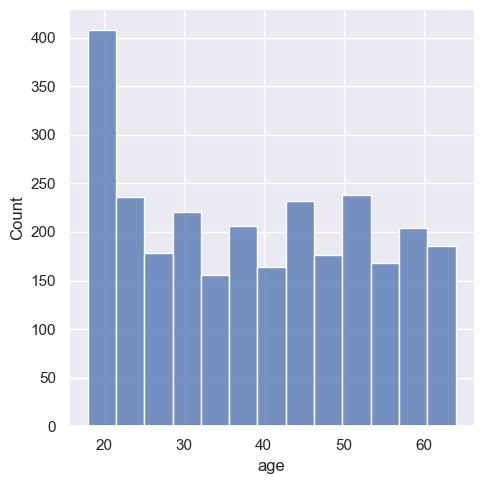

In [11]:
# check data distribution for numerical column (say age)
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['age'])
plt.show()

In [12]:
# find count of each age value
insurance_data['age'].value_counts()

age
18    148
19    142
47     62
52     62
45     62
23     62
46     60
54     60
51     60
28     60
21     60
22     60
26     60
25     58
50     58
27     58
20     58
53     58
48     58
49     56
44     56
41     56
24     56
32     56
30     56
56     56
39     54
33     54
42     54
40     54
43     54
31     54
57     54
29     54
37     52
59     52
58     52
34     52
55     52
35     50
36     50
38     50
62     48
60     46
64     46
63     46
61     46
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

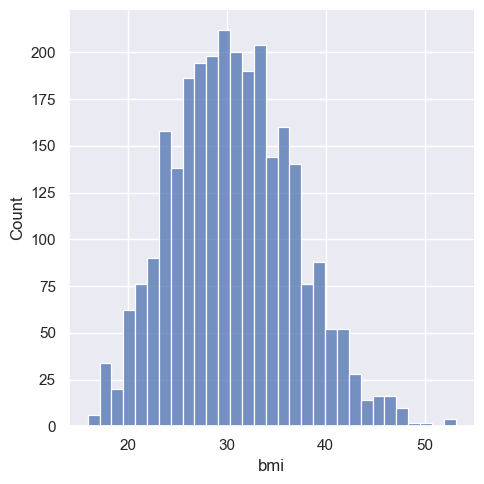

In [13]:
# check data distribution for numerical column (say bmi)
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['bmi'])
plt.show()

<Figure size 600x600 with 0 Axes>

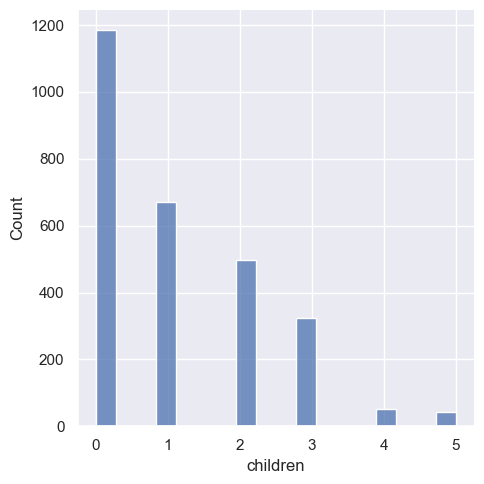

In [14]:
# check data distribution for numerical column (say number of children)
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['children'])
plt.show()

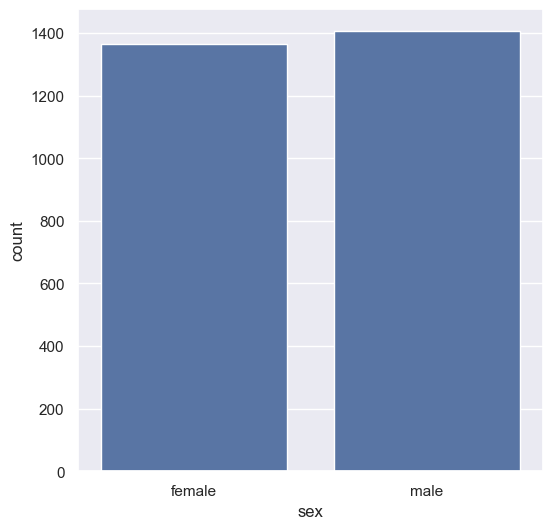

In [15]:
# charts for categorical data (say sex)
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=insurance_data['sex'], data=insurance_data)
plt.show()

In [16]:
# find count of each age value
insurance_data['sex'].value_counts()

sex
male      1406
female    1366
Name: count, dtype: int64

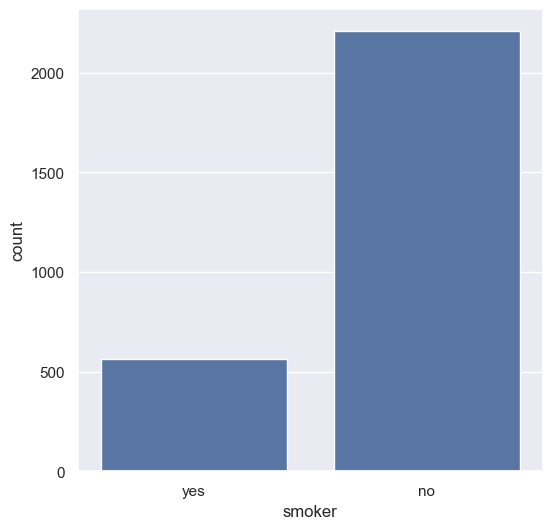

In [17]:
# charts for categorical data (say sex)
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=insurance_data['smoker'], data=insurance_data)
plt.show()

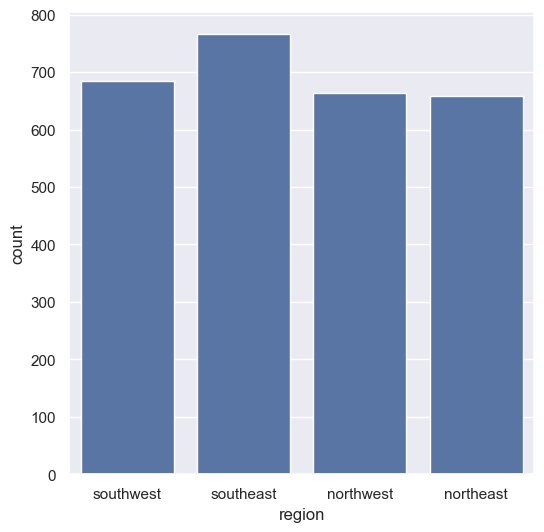

In [18]:
# charts for categorical data (say sex)
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=insurance_data['region'], data=insurance_data)
plt.show()

In [19]:
# find count of each age value
insurance_data['region'].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

In [20]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


### Converting categorical data to numerical data

In [22]:
# Set the future downcasting option to true
pd.set_option('future.no_silent_downcasting', True)

In [23]:
insurance_data.replace({'sex':{'female':0,'male':1}}, inplace=True)
insurance_data.replace({'smoker':{'no':0,'yes':1}}, inplace=True)
insurance_data.replace({'region':{'southeast':0,'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,0,8569.86180
2768,21,0,34.600,0,0,1,2020.17700
2769,19,1,26.030,1,1,3,16450.89470
2770,23,1,18.715,0,0,3,21595.38229


# Creation of Model

In [25]:
# split the data as input data to the model and output data from the model
input_data = insurance_data.drop(columns = ['charges'])
output_data = insurance_data['charges']

In [26]:
input_data

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
2767,47,0,45.320,1,0,0
2768,21,0,34.600,0,0,1
2769,19,1,26.030,1,1,3
2770,23,1,18.715,0,0,3


In [27]:
output_data

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64

In [28]:
#Making input_data and output_data as numpy arrays before fitting it to regressor
input_data = input_data.values
output_data = output_data.values

In [29]:
# split the input and output data into training and testing data this time
input_train_data, input_test_data, output_train_data, output_test_data = train_test_split(input_data, output_data, test_size=0.2)

In [30]:
print(input_data.shape, input_train_data.shape, input_test_data.shape)

(2772, 6) (2217, 6) (555, 6)


In [31]:
print(output_data.shape, output_train_data.shape, output_test_data.shape)

(2772,) (2217,) (555,)


In [32]:
# creating an object 'model' that represents a random forest regressor model
# the RandomForestRegressor class's __init__ method is called
# 'n_estimators=100' creates 100 subtrees
# 'max_depth=7' sets maximum levels to 7
model = RandomForestRegressor(n_estimators=100, max_depth=7)

In [33]:
# fitting the training data into the model
model.fit(input_train_data, output_train_data)

RandomForestRegressor(max_depth=7)

# Testing the Model

In [35]:
# predicting values with Test Dataset
test_data_predictions = model.predict(input_test_data)

In [36]:
test_data_predictions

array([ 6014.37533174, 19115.00285214, 34053.84900032, 20387.2569567 ,
       35525.39459237, 10489.8299095 ,  4280.96964414, 20124.67302563,
        9263.7053871 , 14189.79295058,  3035.06149899,  7380.95693532,
       39499.12024276, 19591.62665914,  6278.3351122 ,  4235.35614439,
       14286.25010547,  5045.95238958,  4645.06480244, 12634.96239042,
       37715.09344748,  5293.02876318,  2885.3028491 , 11552.72675858,
       13727.78886787, 25360.90380069,  9559.34271035,  5798.17965712,
       44555.64650268, 26793.80182384,  2779.27085918, 10257.22212764,
        2000.30680129,  2769.53075261,  6771.45489529,  5370.18381546,
        6474.97487346,  6755.8158081 ,  8098.71804734, 24194.8271297 ,
       13145.57578807,  4199.37779697, 39403.68144155,  7217.63441747,
       21832.71942238, 10752.73146674,  1986.03310289, 20592.22114522,
       20457.4812305 ,  7549.29285399,  3880.27080589,  9288.9074575 ,
        6382.57520961, 19375.99550308,  7818.2670104 , 16380.5430156 ,
      

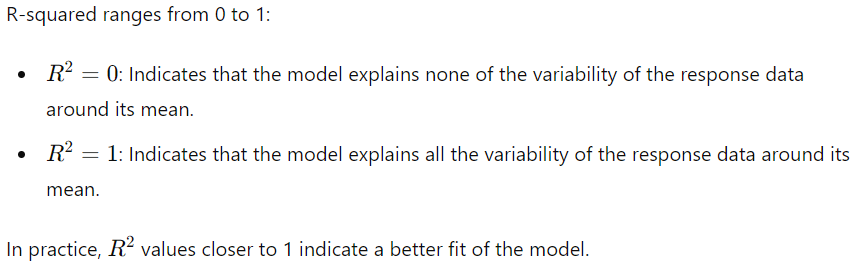

In [38]:
# evaluating the model
# The R-squared score is a statistical measure that indicates 
# how well the regression predictions approximate the real data points
from sklearn.metrics import r2_score

In [39]:
r2_score(test_data_predictions, output_test_data)

0.921744536864344

In [40]:
# predict with new data values
input_data = (23, 1, 35, 2, 1, 0)

# convert it to numpy array
input_data_array = np.asarray(input_data)
input_data_array = input_data_array.reshape(1,-1)

In [41]:
insurance_premium = model.predict(input_data_array)

In [42]:
insurance_premium[0]

35725.15621826481

# Saving the Trained Model

In [44]:
import pickle as pkl

In [45]:
pkl.dump(model, open('Medical_Insurance_Premium_Prediction_Model.pkl', 'wb'))